In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2

#  Saving Features as pandas dataframe

In [2]:
df = pd.read_csv('extracted_feature_values_midi.csv')

In [3]:
cluster_mood_filename = df.cluster_mood_filename
temp = []
cluster = []
mood = []
filename = []

for i in cluster_mood_filename:
    temp.append(i)
temp = [i.split('\\') for i in temp]

for path in temp:
    cluster.append(path[-3])
    mood.append(path[-2])
    filename.append(path[-1].split('.')[0])

df['cluster'] = cluster
df['mood'] = mood
df['filename'] = filename

cols = [col for col in df.columns]
xcols = cols[1:-3]
ycol = cols[-3]
print(ycol)

cluster


#  Applying label encoder and splitting the dataset into train and test datasets

In [4]:
le = preprocessing.LabelEncoder()
X = df[xcols]
X = X.fillna(0)
Y = df[ycol]
Y = pd.DataFrame(Y)
Y = Y.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')
files = df['filename']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
# print(type(df))
# print(type(X_train))
# print(type(Y_train))
# print(type(xcols))
# print(type(ycol))
# print(X.isnull().sum())
# print(Y.isnull().sum())
# print(X.shape)
# X_nonan = X.fillna(0)
# print(X_nonan.isnull().values.any())
# print(X_nonan.shape)
print(X_train.shape)
print(Y_train.shape)
X_train.head()


(156, 1495)
(156, 1)


,Basic_Pitch_Histogram_0,Basic_Pitch_Histogram_1,Basic_Pitch_Histogram_2,Basic_Pitch_Histogram_3,Basic_Pitch_Histogram_4,Basic_Pitch_Histogram_5,Basic_Pitch_Histogram_6,Basic_Pitch_Histogram_7,Basic_Pitch_Histogram_8,Basic_Pitch_Histogram_9,...,Parallel_Motion,Similar_Motion,Contrary_Motion,Oblique_Motion,Parallel_Fifths,Parallel_Octaves,Dynamic_Range,Variation_of_Dynamics,Variation_of_Dynamics_In_Each_Voice,Average_Note_to_Note_Change_in_Dynamics
67,0.0,0,0,0,0,0,0,0,0,0,...,0.02741,0.2489,0.06475,0.6590,0.001884,0.005481,74,18.10,6.840,8.9770
61,0.0,0,0,0,0,0,0,0,0,0,...,0.04335,0.3174,0.07575,0.5635,0.004548,0.007391,100,28.62,15.790,11.9600
27,0.0,0,0,0,0,0,0,0,0,0,...,0.05882,0.1979,0.04651,0.6968,0.000912,0.028270,127,26.74,23.560,2.8230
192,0.0,0,0,0,0,0,0,0,0,0,...,0.30480,0.1162,0.03947,0.5395,0.061400,0.100900,81,17.12,4.546,0.7266
75,0.0,0,0,0,0,0,0,0,0,0,...,0.06205,0.2979,0.09380,0.5463,0.002565,0.004970,113,19.24,9.977,4.4020


#  Normalizing the dataset for improved svm performance

In [5]:
#Normalizing using standard scalor 
normalized_X = X.values
std_scalor = preprocessing.StandardScaler()
X_scaled = std_scalor.fit_transform(normalized_X)
normalized_X = pd.DataFrame(X_scaled, columns=xcols)
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(normalized_X, Y, test_size=0.3)
normalized_X.head()

,Basic_Pitch_Histogram_0,Basic_Pitch_Histogram_1,Basic_Pitch_Histogram_2,Basic_Pitch_Histogram_3,Basic_Pitch_Histogram_4,Basic_Pitch_Histogram_5,Basic_Pitch_Histogram_6,Basic_Pitch_Histogram_7,Basic_Pitch_Histogram_8,Basic_Pitch_Histogram_9,...,Parallel_Motion,Similar_Motion,Contrary_Motion,Oblique_Motion,Parallel_Fifths,Parallel_Octaves,Dynamic_Range,Variation_of_Dynamics,Variation_of_Dynamics_In_Each_Voice,Average_Note_to_Note_Change_in_Dynamics
0,-0.071611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.029958,-0.288967,0.402916,-0.870700,0.234466,1.133501,0.432650,-0.153625,-0.318140,-0.272365
1,-0.071611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.322842,-0.966963,-1.480627,1.640473,0.192266,-0.432250,-0.930685,1.625977,-1.484887,-1.258050
2,-0.071611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.763202,-0.735132,7.522922,-1.031701,-0.492572,-0.698894,3.295654,1.931535,3.223318,0.950938
3,-0.071611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.420798,-0.860234,0.228022,1.095548,-0.463812,-0.598059,-0.555768,0.575720,-0.355290,-0.264760
4,-0.071611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.187340,-0.771875,-0.317818,0.968059,-0.413584,0.121219,0.330400,-2.150035,-1.363933,-1.262548


# SVM classification on original dataset without feature selection

In [6]:
# %%time
# #clf = LinearSVC(max_iter = 10000000, verbose = 1)
# clf = svm.SVC(C=1, kernel='linear', verbose = True)
# clf.fit(X_train, Y_train.values.ravel())
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20)
# #cv = StratifiedKFold(5)
# #cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20, random_state=1)
# train_accuracy_svm = cross_val_score(clf, X_train, Y_train.values.ravel(), cv=cv, n_jobs=15).mean()
# test_accuracy_svm = clf.score(X_test, Y_test.values.ravel())

# print("Training accuracy " + str(train_accuracy_svm))
# print("Test accuracy " + str(test_accuracy_svm))

# SVM classification on normalized dataset without feature selection

In [7]:
%%time
clf = svm.SVC(C=0.1, kernel='linear', verbose = True)
clf.fit(X_train3, Y_train3.values.ravel())
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20)
#cv = StratifiedKFold(5)
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20, random_state=1)
train_accuracy_svm_norm = cross_val_score(clf, X_train3, Y_train3.values.ravel(), cv=cv, n_jobs=15).mean()
test_accuracy_svm_norm = clf.score(X_test3, Y_test3.values.ravel())

print("Training accuracy " + str(train_accuracy_svm_norm))
print("Test accuracy " + str(test_accuracy_svm_norm))

[LibSVM]Training accuracy 0.3042307692307692
Test accuracy 0.3389830508474576
Wall time: 5.51 s


#  Feature Selection on Midi features

Methods to employ -<br> 1) Tree based feature selection(Random Forests) <br>
                    2) Recursive feature elimination with cross validation using SVM estimators <br>
                    3) Anova F-measures <br>
                    4) Chi-squared <br>
                    5) Principal component analysis<br>
We will apply each of them individually, evaluate performance, and choose a combination
Principal component analysis should be performed as the dimensions of the feature vectore(1495) is more than the number of samples(196) <br>

**study showed svm classification based on midi features had a test accuracy of 35%**

https://www.kaggle.com/arrohit/feature-selection-and-hypertuning-svm  **tree based feature selection**

In [8]:
%%time
rf_clf = RandomForestClassifier()
rf_clf = rf_clf.fit(X_train3, Y_train3.values.ravel())
model = SelectFromModel(rf_clf, prefit=True)

rf_X_train = X_train3.loc[:, model.get_support()]
rf_X_test = X_test3.loc[:, model.get_support()]
print(type(rf_X_train))
print(rf_X_train.shape)
rf_X_train.head()

<class 'pandas.core.frame.DataFrame'>
(137, 545)
Wall time: 171 ms


,Basic_Pitch_Histogram_23,Basic_Pitch_Histogram_28,Basic_Pitch_Histogram_31,Basic_Pitch_Histogram_32,Basic_Pitch_Histogram_33,Basic_Pitch_Histogram_34,Basic_Pitch_Histogram_35,Basic_Pitch_Histogram_36,Basic_Pitch_Histogram_38,Basic_Pitch_Histogram_39,...,Variability_of_Voice_Separation,Parallel_Motion,Similar_Motion,Contrary_Motion,Oblique_Motion,Parallel_Fifths,Parallel_Octaves,Dynamic_Range,Variation_of_Dynamics,Average_Note_to_Note_Change_in_Dynamics
83,-0.165109,-0.356986,-0.329841,-0.309868,-0.607291,-0.411287,-0.206451,0.158301,0.176806,-0.326382,...,-0.808205,-0.403095,0.567495,-0.319619,0.066164,-0.296203,-0.301697,0.296317,-0.262643,0.305064
23,-0.004885,-0.326901,-0.071276,-0.268808,-0.325148,-0.290951,-0.512604,-0.479594,-0.597462,-0.334384,...,0.191633,-0.418216,0.525503,0.567456,-0.170602,-0.428859,-0.388673,1.182485,0.225634,0.354589
164,-0.165109,-0.356986,-0.440096,-0.309868,-0.616224,-0.411287,-0.512604,-0.339572,-0.172615,-0.334384,...,-0.554882,-0.170523,0.807200,0.553275,-0.645591,-0.230242,-0.142211,0.637151,0.787614,-1.224389
117,-0.165109,-0.348048,-0.239235,-0.273291,2.149520,-0.384476,-0.106932,-0.527681,0.489161,-0.334384,...,-0.303096,-0.488143,0.375032,-1.016269,0.536052,0.023006,-0.543016,-0.589851,-0.348629,1.242156
48,-0.165109,-0.356986,-0.133563,0.076044,-0.606992,0.822857,-0.476093,-0.330120,-0.612360,0.053341,...,-0.132805,-0.474423,0.081963,-0.614260,0.636587,-0.071807,-0.526299,0.262233,0.485128,0.706092


In [9]:
%%time
clf = svm.SVC(C=0.1, kernel='linear', verbose = True)
clf.fit(rf_X_train, Y_train3.values.ravel())
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20)
#cv = StratifiedKFold(5)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20, random_state=1)
train_accuracy_svm_rf = cross_val_score(clf, rf_X_train, Y_train3.values.ravel(), cv=cv, n_jobs=15).mean()
test_accuracy_svm_rf = clf.score(rf_X_test, Y_test3.values.ravel())

print("Training accuracy " + str(train_accuracy_svm_rf))
print("Test accuracy " + str(test_accuracy_svm_rf))

[LibSVM]Training accuracy 0.3857967032967033
Test accuracy 0.3559322033898305
Wall time: 999 ms


https://machinelearningmastery.com/rfe-feature-selection-in-python/ **RFECV**

In [10]:
%%time
clf = svm.SVC(C=0.1, kernel='linear')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20, random_state = 1)
#cv = StratifiedKFold(5)
rfecv = RFECV(estimator = clf, step = 5, cv = cv, scoring='accuracy', n_jobs=15 )
rfetrain=rfecv.fit(X_train3, Y_train3.values.ravel())
print('Optimal number of features :', rfecv.n_features_)

Optimal number of features : 30
Wall time: 2min


In [11]:
%%time
rfe = RFE(estimator=clf, n_features_to_select=rfecv.n_features_, step=1)
rfe = rfe.fit(X_train3, Y_train3.values.ravel())

rfe_X_train = X_train3.loc[:, rfe.get_support()]
rfe_X_test = X_test3.loc[:, rfe.get_support()]

Wall time: 11.8 s


In [12]:
rfe_X_train.head()

,Basic_Pitch_Histogram_49,Basic_Pitch_Histogram_78,Relative_Prevalence_of_Top_Pitch_Classes,Pitch_Skewness,Pitch_Class_Kurtosis,Distance_Between_Most_Prevalent_Melodic_Intervals,Relative_Prevalence_of_Most_Common_Melodic_Intervals,Melodic_Thirds,Second_Most_Common_Vertical_Interval,Prevalence_of_Second_Most_Common_Vertical_Interval,...,Mean_Tempo,Beat_Histogram_1,Pitched_Instruments_Present_0,Pitched_Instruments_Present_27,Pitched_Instruments_Present_30,Note_Prevalence_of_Unpitched_Instruments_9,Time_Prevalence_of_Pitched_Instruments_2,Time_Prevalence_of_Pitched_Instruments_30,Voice_Separation,Oblique_Motion
83,-0.431326,0.682362,1.256822,-0.045557,0.134566,-0.356785,1.310796,1.005852,0.671383,-0.668962,...,0.133081,0.777068,-0.737094,1.601136,-0.624557,-0.332661,-0.21388,-0.54221,-1.176181,0.066164
23,-0.431326,-0.496824,1.319222,0.107416,-0.624190,-0.618695,0.542664,0.131424,0.671383,-0.909491,...,-0.894210,-0.364639,1.356680,-0.624557,-0.624557,-0.309569,-0.21388,-0.54221,0.004689,-0.170602
164,-0.431326,1.501429,-0.189735,1.680540,0.045301,2.000402,-0.652752,-0.911759,-1.182013,-0.965427,...,0.614623,-0.568087,1.356680,1.601136,-0.624557,-0.332661,-0.21388,-0.54221,0.473310,-0.645591
117,1.985333,-0.253338,0.454898,-1.050582,-0.487317,0.690854,1.030098,-1.302591,0.671383,0.813362,...,-0.187947,-0.517486,1.356680,-0.624557,-0.624557,-0.332661,-0.21388,-0.54221,-1.079503,0.536052
48,-0.177755,-0.480104,-0.408911,0.470228,-0.743211,0.690854,1.118318,1.140024,0.671383,0.810565,...,1.430035,-0.220709,-0.737094,1.601136,-0.624557,-0.332661,-0.21388,-0.54221,-0.405575,0.636587


In [13]:
for index, rank in enumerate(rfe.ranking_):
    if rank in [1,15]:
        print("Rank " + str(rank)+ " feature: " + xcols[index])

Rank 1 feature: Basic_Pitch_Histogram_49
Rank 1 feature: Basic_Pitch_Histogram_78
Rank 1 feature: Relative_Prevalence_of_Top_Pitch_Classes
Rank 1 feature: Pitch_Skewness
Rank 1 feature: Pitch_Class_Kurtosis
Rank 1 feature: Distance_Between_Most_Prevalent_Melodic_Intervals
Rank 1 feature: Relative_Prevalence_of_Most_Common_Melodic_Intervals
Rank 1 feature: Melodic_Thirds
Rank 1 feature: Second_Most_Common_Vertical_Interval
Rank 15 feature: Distance_Between_Two_Most_Common_Vertical_Intervals
Rank 1 feature: Prevalence_of_Second_Most_Common_Vertical_Interval
Rank 1 feature: Rhythmic_Value_Histogram_5
Rank 1 feature: Difference_Between_Most_Common_Rhythmic_Values
Rank 1 feature: Rhythmic_Value_Kurtosis
Rank 1 feature: Rhythmic_Value_Median_Run_Lengths_Histogram_11
Rank 1 feature: Median_Rhythmic_Value_Offset
Rank 1 feature: Beat_Histogram_Tempo_Standardized_43
Rank 1 feature: Beat_Histogram_Tempo_Standardized_60
Rank 1 feature: Beat_Histogram_Tempo_Standardized_81
Rank 1 feature: Beat_Hist

In [14]:
%%time
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20)
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20, random_state = 1)
#cv = StratifiedKFold(5)
train_accuracy_svm_rfe = cross_val_score(estimator=clf,X=rfe_X_train,y=Y_train3.values.ravel(), cv=cv, n_jobs=15).mean()
print("Training accuracy " + str(train_accuracy_svm_rfe))
clf = clf.fit(rfe_X_train, Y_train3.values.ravel())
test_accuracy_svm_rfe = clf.score(rfe_X_test, Y_test3.values.ravel())
print("Test accuracy " + str(test_accuracy_svm_rfe))

Training accuracy 0.6853021978021977
Test accuracy 0.4745762711864407
Wall time: 204 ms


https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/ **ANOVA F measure**

In [15]:
%%time
clf = svm.SVC(C=0.1, kernel='linear', verbose = True)
num_features = []
train_acc_F_measure = []
test_acc_F_measure = []
xcols = np.array(xcols)
for count in range(5,1496,5):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20)
    test = SelectKBest(score_func=f_classif, k = count)
    X_F_measure = test.fit_transform(normalized_X,Y.values.ravel())
    f_xcols = xcols[test.get_support()]
    X_F_measure = pd.DataFrame(X_F_measure, columns=f_xcols)
    X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_F_measure, Y, test_size=0.3)
    clf.fit(X_train2, Y_train2.values.ravel())
    train_accuracy_svm_f = cross_val_score(clf, X_train2, Y_train2.values.ravel(), cv=cv, n_jobs=15).mean()
    test_accuracy_svm_f = clf.score(X_test2, Y_test2.values.ravel())
    
    num_features.append(count)
    train_acc_F_measure.append(train_accuracy_svm_f)
    test_acc_F_measure.append(test_accuracy_svm_f)
    
    

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   15   18   20  113
  114  116  117  118  119  120  121  122  123  124  125  127  259  266
  270  271  272  273  274  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  423  425  427  428  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448
  449  450  451  452  453  454  455  456  457  458  459  460  461  462
  463  464  465  466  467  468  469  529  982 1018 1019 1044 1046 1057
 1063 1065 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1193 1194 1219 1221 1232 1238 1240 1246 1250 1251 1253 1256 1257
 1258 1261 1263 1270 1273 1313 1332 1368 1369 1394 1396 1407 1413 1415
 1421 1422 1425 1426 1428 1

[LibSVM]Wall time: 4min 21s


In [16]:
best_tacc_f = max(test_acc_F_measure)
nfeats = num_features[test_acc_F_measure.index(best_tacc_f)]
corr_train_f = train_acc_F_measure[test_acc_F_measure.index(best_tacc_f)]

print("Number of features: " + str(nfeats))
print("Train Accuracy: " + str(corr_train_f))
print("Test Accuracy: " + str(best_tacc_f))

Number of features: 365
Train Accuracy: 0.5160164835164835
Test Accuracy: 0.6440677966101694


#  Graph Maker

['None', 'Random Forest', 'RFE', 'ANOVA F Measure']
[0.3042307692307692, 0.3857967032967033, 0.6853021978021977, 0.5160164835164835]
[0.3389830508474576, 0.3559322033898305, 0.4745762711864407, 0.6440677966101694]


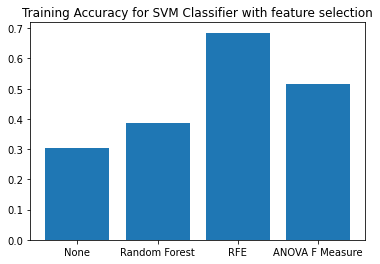

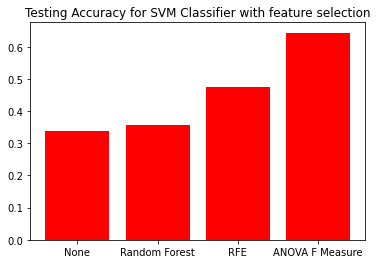

In [17]:
train_accuracy_list = [train_accuracy_svm_norm, train_accuracy_svm_rf, train_accuracy_svm_rfe, corr_train_f ]
test_accuracy_list = [test_accuracy_svm_norm, test_accuracy_svm_rf, test_accuracy_svm_rfe, best_tacc_f ]
labels = ['None', 'Random Forest', 'RFE', 'ANOVA F Measure']

print(labels)
print(train_accuracy_list)
print(test_accuracy_list)

fig1,ax1 = plt.subplots()
ax1.set_title("Training Accuracy for SVM Classifier with feature selection")
ax1.bar(labels, train_accuracy_list)
plt.savefig("Train_Accuracy.png")

fig2,ax2 = plt.subplots()
ax2.set_title("Testing Accuracy for SVM Classifier with feature selection")
ax2.bar(labels, test_accuracy_list, color='r')
plt.savefig("Test_Accuracy.png")